In [10]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [11]:
import pandas as pd
import sklearn as skl
from pprint import pprint
import scipy
import sys
import pandas as pd
from matplotlib import pyplot as plt
import pylab as pl

In [12]:
data = pd.read_csv('train.csv')

In [13]:
print("Amount absent values 'ftemp': %.3f" % (len(data[data.ftemp == '-']) / len(data) * 100), '%')
data.head()

Amount absent values 'ftemp': 25.138 %


,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
0,2011-01-03,0,0,1,1,1,0.22,0.19699999999999998,0.44,0.3582,0,15,15
1,2011-01-03,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,6,6
2,2011-01-03,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,3,3
3,2011-01-03,5,0,1,1,1,0.16,0.1364,0.47,0.2836,0,9,9
4,2011-01-03,6,0,1,1,1,0.14,-,0.50,0.3881,0,90,90


In [14]:
known_ftemp = data[data.ftemp != '-']
medium_diff = np.mean(known_ftemp.temp - known_ftemp.ftemp.astype(float))
medium_diff

0.02095721286370588

In [15]:
data.loc[data.ftemp == '-', 'ftemp'] = data.temp - medium_diff

In [16]:
data.corr()

,hour,holiday,workingday,weekday,weather_type,temp,humidity,wind_speed,casual,subscribed,usage
hour,1.000000,0.000468,0.002209,-0.003679,-0.029682,0.131916,-0.271771,0.127540,0.028011,0.371302,0.098023
holiday,0.000468,1.000000,-0.247877,-0.094536,-0.013434,-0.008131,0.006655,-0.019608,0.002130,-0.041417,-0.005842
workingday,0.002209,-0.247877,1.000000,0.036898,0.057356,0.053103,0.025730,-0.004804,-0.015372,0.134013,0.010684
weekday,-0.003679,-0.094536,0.036898,1.000000,0.000816,0.000837,-0.043147,0.025951,-0.000206,0.015390,0.002738
weather_type,-0.029682,-0.013434,0.057356,0.000816,1.000000,-0.083150,0.417010,0.044447,-0.015864,-0.131915,-0.040555
temp,0.131916,-0.008131,0.053103,0.000837,-0.083150,1.000000,-0.032506,-0.035742,0.040763,0.332923,0.103055
humidity,-0.271771,0.006655,0.025730,-0.043147,0.417010,-0.032506,1.000000,-0.282958,-0.036357,-0.268173,-0.086425
wind_speed,0.127540,-0.019608,-0.004804,0.025951,0.044447,-0.035742,-0.282958,1.000000,0.010544,0.080219,0.025531
casual,0.028011,0.002130,-0.015372,-0.000206,-0.015864,0.040763,-0.036357,0.010544,1.000000,0.065853,0.981693
subscribed,0.371302,-0.041417,0.134013,0.015390,-0.131915,0.332923,-0.268173,0.080219,0.065853,1.000000,0.254705


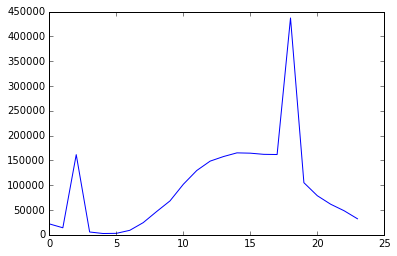

In [390]:
sums = []
for a in range(0, 24):
    sums.append(data.casual[data['hour'] == a].sum())
plt.plot(sums)

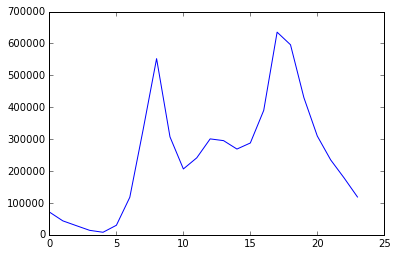

In [388]:
sums = []
for a in range(0, 24):
    sums.append(data.subscribed[data['hour'] == a].sum())
plt.plot(sums)

In [412]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor

data_test_set = data

data_test_set = data_test_set.drop(['date', 'holiday', 'weekday', 'ftemp', 'casual', 'subscribed', 'usage'], 1)
X_train, X_test, y_train, y_test = train_test_split(data_test_set, data.subscribed)

# X_train = np.transpose(np.atleast_2d(X_train))
# X_test = np.transpose(np.atleast_2d(X_test))

y_train_subsribed = y_train
y_test_subsribed = y_test

linear_regression1 = KNeighborsRegressor(n_neighbors=11, n_jobs=-1)

linear_regression1.fit(X_train, y_train_subsribed)
y_predicted1 = linear_regression1.predict(X_test)
print("Error for subscribed: ", mean_absolute_error(y_test_subsribed, y_predicted1))
print("R2: ", r2_score(y_test_subsribed, y_predicted1))

Error for subscribed:  134.811233707
R2:  0.805164995846


In [449]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

data_test_set = data

data_test_set = data_test_set.drop(['date', 'holiday', 'weekday', 'ftemp', 'casual', 'subscribed', 'usage'], 1)
X_train, X_test, y_train, y_test = train_test_split(data_test_set, data.casual)

# X_train = np.transpose(np.atleast_2d(X_train))
# X_test = np.transpose(np.atleast_2d(X_test))

y_train_casual = y_train
y_test_casual = y_test

# linear_regression2 = KNeighborsRegressor(n_neighbors=1, n_jobs=-1)
linear_regression2 = RandomForestRegressor(n_estimators=100, max_features ='sqrt')

linear_regression2.fit(X_train, y_train_casual)
y_predicted2 = linear_regression2.predict(X_test)
print("Error for casual: ", mean_absolute_error(y_test_casual, y_predicted2))
print("R2: ", r2_score(y_test_casual, y_predicted2))

y_predicted2[y_predicted2 < 0]

Error for casual:  79.3929498188
R2:  -4.79984034769


array([], dtype=float64)

In [450]:
y_final = y_predicted1 + y_predicted2
a = np.array(y_test_casual) + np.array(y_test_subscribed)
np.mean(abs(a - y_final))

489.96738614692151

In [451]:
test_data = pd.read_csv('test.csv')
data_index = test_data.Id.values
data_x = test_data.drop(['Id', 'date', 'holiday', 'weekday', 'ftemp'], 1)
answers_subcribed = linear_regression1.predict(data_x)
answers_casual = linear_regression2.predict(data_x)
answers = answers_subcribed + answers_casual

In [452]:
import csv
with open('submission.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(("Id", "Expected"))
        for i in range(0, len(data_x)):
            writer.writerow((data_index[i], answers[i]))